# Cluster Analysis: The need for rescaling data

## Load Packages

In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Read Data and Cluster

In [2]:
# Read the data from the Cluster.csv file
df = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/Cluster.csv',index_col='T',parse_dates=True)
# Convert the data into an array
X = df.values

In [3]:
cluster = KMeans(n_clusters=2,n_init=10,random_state=0)
cluster.fit(X)

KMeans(n_clusters=2, random_state=0)

In [4]:
new_point = np.array([8.0,1.0]).reshape(1,-1)
new_point_cluster = cluster.predict(new_point)

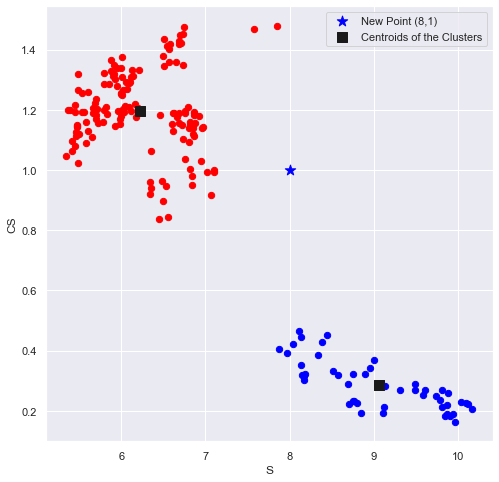

In [5]:
y=cluster.predict(X)
fig,ax = plt.subplots(figsize=(8,8))
idx_1 = y==1
idx_0 = y==0
color_1='blue'
color_0 ='red'
ax.scatter(X[idx_1,0],X[idx_1,1],s=40,color=color_1,label=None)
ax.scatter(X[idx_0,0],X[idx_0,1],s=40,color=color_0,label=None)

if new_point_cluster==1:
    color_code = color_1
else:
    color_code = color_0
    
ax.scatter(new_point[0,0],new_point[0,1],s=120,
           color=color_code,marker='*',
           label='New Point (8,1)')
ax.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],s=120,
           color='k',marker='s',
           label='Centroids of the Clusters')

ax.set_xlabel('S')
ax.set_ylabel('CS');
ax.legend();

## Re-weight Data

In [6]:
# Scale data with 1/ std x sqrt(2)
weight = np.std(X,axis=0)
X_scaled = X/weight

In [7]:
# Initialize Kmeans for 2 clusters and fit it to the data
cluster_with_scaling = KMeans(n_clusters=2, n_init=10,init='random',random_state=0)
cluster_with_scaling.fit(X_scaled)
new_point = np.array([8.0,1.0]).reshape(1,-1)
new_point_scaled = new_point / weight 
new_point_cluster_scaling = cluster_with_scaling.predict(new_point_scaled)

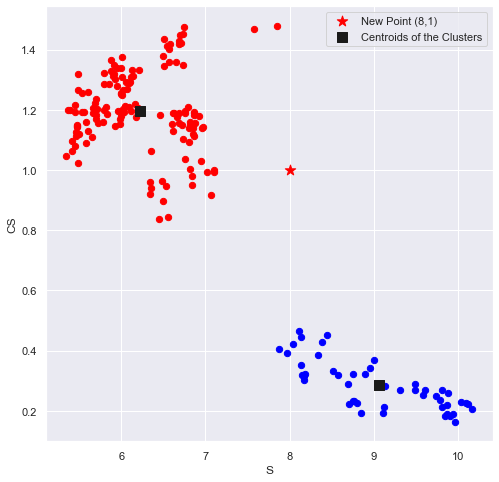

In [8]:
y=cluster_with_scaling.predict(X_scaled)
fig,ax = plt.subplots(figsize=(8,8))
idx_1 = y==1
idx_0 = y==0
color_1='blue'
color_0 ='red'
ax.scatter(X[idx_1,0],X[idx_1,1],s=40,color=color_1,label=None)
ax.scatter(X[idx_0,0],X[idx_0,1],s=40,color=color_0,label=None)

if new_point_cluster_scaling==1:
    color_code = color_1
else:
    color_code = color_0
    
ax.scatter(new_point[0,0],new_point[0,1],s=120,
           color=color_code,marker='*',
           label='New Point (8,1)')
ax.scatter(weight[0]*cluster_with_scaling.cluster_centers_[:,0],weight[1]*cluster_with_scaling.cluster_centers_[:,1],s=120,
           color='k',marker='s',
           label='Centroids of the Clusters')

ax.set_xlabel('S')
ax.set_ylabel('CS');
ax.legend();